# Movie Data and User Ratings Analysis

## Introduction

This notebook aims to perform an in-depth analysis of a movie rating dataset, which includes information about movies, user ratings, and demographic data about users. We will explore the relationships between these data sets to answer important analytical questions and provide valuable insights using visualizations.

## Data Loading and Exploration

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings = pd.read_csv("ratings.dat", sep="::", engine="python", names=["UserID", "MovieID", "Rating", "Timestamp"])
users = pd.read_csv("users.dat", sep="::", engine="python", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
movies = pd.read_csv("movies.dat", sep="::", engine="python", names=["MovieID", "Title", "Genres"])

# Merge all data
df = ratings.merge(users, on="UserID").merge(movies, on="MovieID")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,2000-12-31 22:12:40,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,2000-12-31 22:35:09,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,2000-12-31 22:32:48,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,2000-12-31 22:04:35,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,2001-01-06 23:38:11,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


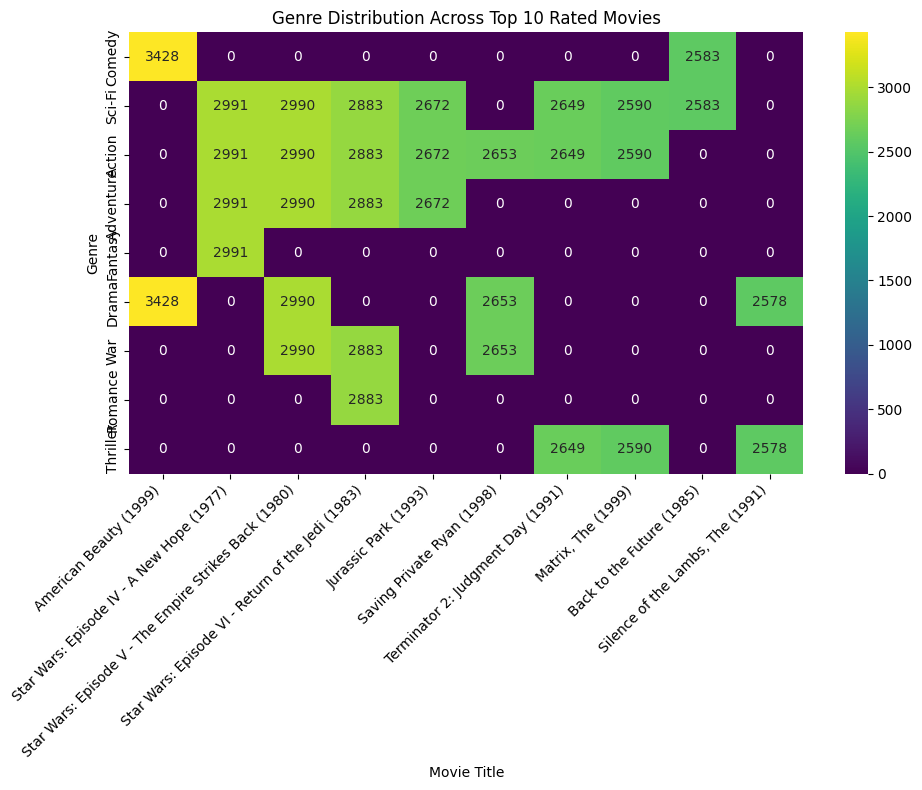

In [39]:
top_movies = df['Title'].value_counts().head(10).index
df_filtered = df[df['Title'].isin(top_movies)]
genres = df_filtered['Genres'].str.split('|').explode().unique()
df_2dhist = pd.DataFrame(0, index=genres, columns=top_movies)

for title in top_movies:
    movie_genres = df_filtered[df_filtered['Title'] == title]['Genres'].str.split('|').explode()
    genre_counts = movie_genres.value_counts()
    for genre, count in genre_counts.items():
        df_2dhist.loc[genre, title] = count

plt.figure(figsize=(10, 8))
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Movie Title')
plt.ylabel('Genre')
plt.title('Genre Distribution Across Top 10 Rated Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Extract datetime info

In [12]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["DayOfWeek"] = df["Datetime"].dt.day_name()
df["Hour"] = df["Datetime"].dt.hour


###  Top rated movies (min 100 ratings)

**Insights:**
- Filtering movies with at least 100 ratings ensures statistical significance. Movies with very few ratings might have skewed averages that don't represent true quality.

In [13]:
top_movies = df.groupby("Title").agg({"Rating": ["mean", "count"]})
top_movies.columns = ["AvgRating", "NumRatings"]
top_movies = top_movies[top_movies["NumRatings"] >= 100]
top_movies.sort_values("AvgRating", ascending=False).head(10)


,AvgRating,NumRatings
Title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.560510,628
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Close Shave, A (1995)",4.520548,657
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
"Wrong Trousers, The (1993)",4.507937,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489,470
Raiders of the Lost Ark (1981),4.477725,2514


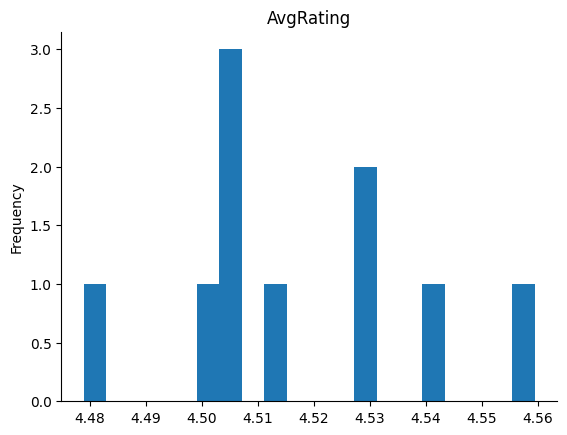

In [14]:
from matplotlib import pyplot as plt
_df_16['AvgRating'].plot(kind='hist', bins=20, title='AvgRating')
plt.gca().spines[['top', 'right',]].set_visible(False)

###  Most active users

**Insights:**
- Identifying the most active users helps understand user engagement patterns and can reveal power users who contribute significantly to the rating dataset.

In [16]:
df["UserID"].value_counts().head(10)



,count
UserID,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521
889,1518
3618,1344
2063,1323
1150,1302


###  Rating distribution

**Insights:**
- The rating distribution shows how users typically rate movies. Most rating systems show a positive skew, with users more likely to give higher ratings.

Text(0.5, 1.0, 'Rating Distribution')

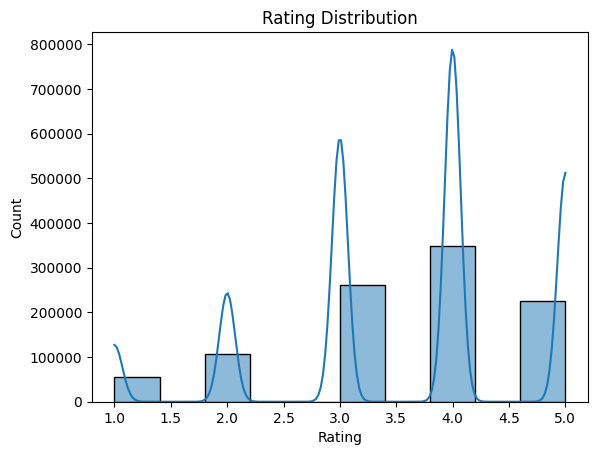

In [17]:
sns.histplot(df["Rating"], bins=10, kde=True)
plt.title("Rating Distribution")


###  Ratings per year

**Insights:**
- Analyzing ratings per year reveals temporal trends in user activity, which could correlate with platform growth, movie release patterns, or external events.

Text(0.5, 1.0, 'Number of Ratings per Year')

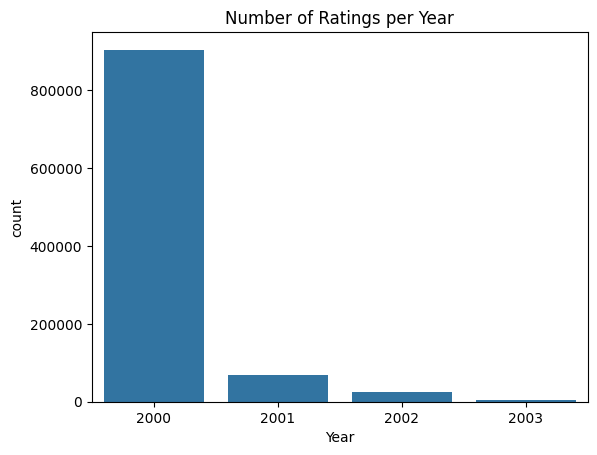

In [18]:
sns.countplot(data=df, x="Year")
plt.title("Number of Ratings per Year")


###  Top genres (exploded)

**Insights:**
- Genre analysis reveals the most popular movie categories. Drama and Comedy typically dominate due to their broad appeal and frequent production.

<Axes: title={'center': 'Top Genres'}, xlabel='Genres'>

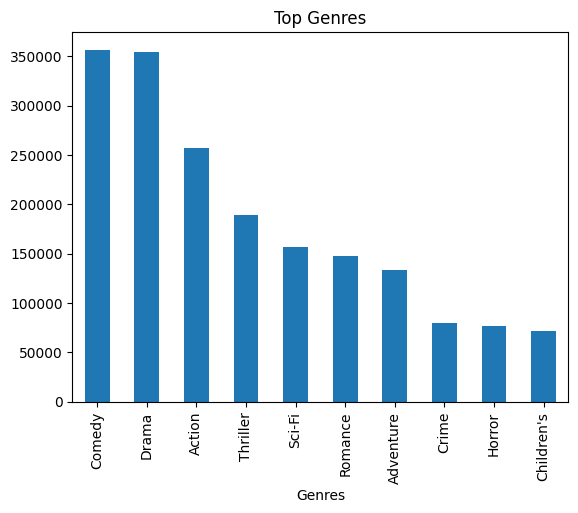

In [19]:
df["Genres"] = df["Genres"].fillna("")
all_genres = df["Genres"].str.split("|").explode()
all_genres.value_counts().head(10).plot(kind="bar", title="Top Genres")


### Average rating per genre

**Insights:**
- Calculating average ratings per genre helps identify which types of movies are generally better received by audiences.

In [21]:
genre_data = df.copy()
genre_data = genre_data.assign(Genres=genre_data["Genres"].str.split("|"))
genre_avg = genre_data.explode("Genres").groupby("Genres")["Rating"].mean().sort_values(ascending=False)
print(genre_avg)


Genres
Film-Noir      4.075188
Documentary    3.933123
War            3.893327
Drama          3.766332
Crime          3.708679
Animation      3.684868
Mystery        3.668102
Musical        3.665519
Western        3.637770
Romance        3.607465
Thriller       3.570466
Comedy         3.522099
Action         3.491185
Adventure      3.477257
Sci-Fi         3.466521
Fantasy        3.447371
Children's     3.422035
Horror         3.215013
Name: Rating, dtype: float64


### Gender-based rating differences

**Insights:**
- Gender-based rating differences can reveal whether male and female users have different rating behaviors or preferences.

<Axes: title={'center': 'Avg Ratings by Gender'}, xlabel='Gender'>

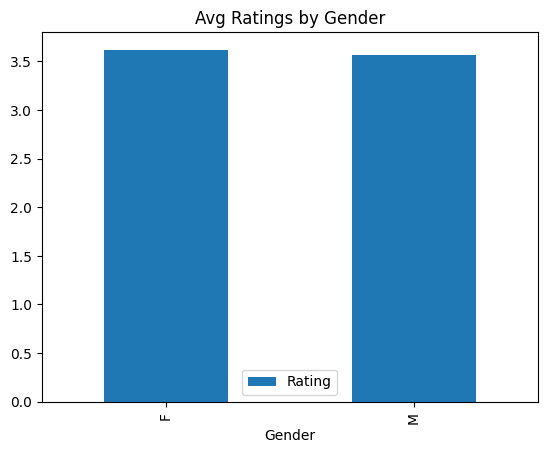

In [22]:
gender_rating = df.pivot_table(index="Gender", values="Rating", aggfunc="mean")
gender_rating.plot(kind="bar", title="Avg Ratings by Gender")


###  Age-based average ratings

**Insights:**
- Age-based analysis shows how different generations rate movies, potentially revealing generational preferences or rating strictness.

<Axes: title={'center': 'Avg Rating by Age'}, xlabel='Age'>

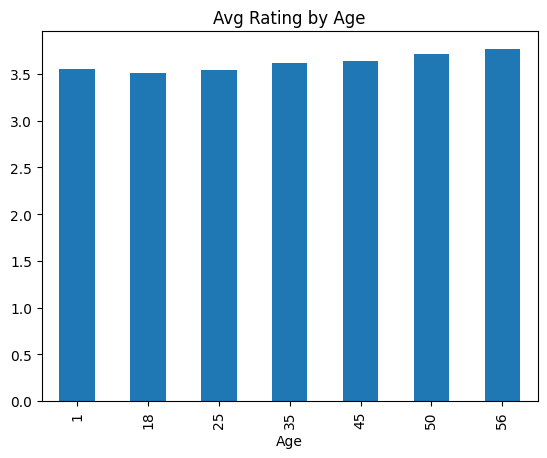

In [23]:
age_rating = df.groupby("Age")["Rating"].mean()
age_rating.plot(kind="bar", title="Avg Rating by Age")


###  Average rating per hour

**Insights:**
- Hourly rating patterns can reveal when users are most active and whether time of day affects rating behavior (e.g., late-night vs. daytime viewing).

<Axes: title={'center': 'Average Rating by Hour'}, xlabel='Hour'>

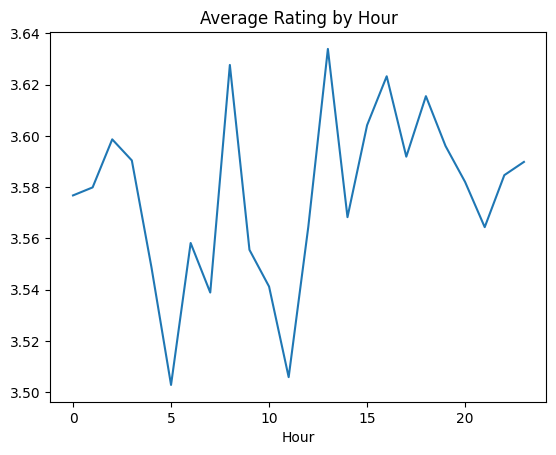

In [24]:
df.groupby("Hour")["Rating"].mean().plot(title="Average Rating by Hour")


###  Movie rating trend over time

**Insights:**
- Monthly trends in average ratings can show whether users become more or less generous with ratings over time, or if seasonal effects influence ratings.

/tmp/ipython-input-25-1791380317.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.set_index("Datetime").resample("M")["Rating"].mean()


<Axes: title={'center': 'Monthly Avg Rating'}, xlabel='Datetime'>

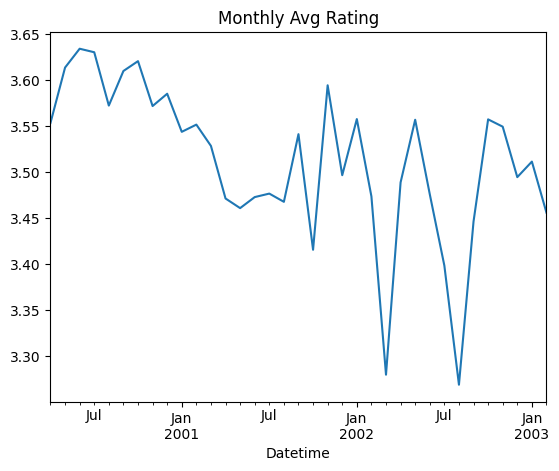

In [25]:
monthly_avg = df.set_index("Datetime").resample("M")["Rating"].mean()
monthly_avg.plot(title="Monthly Avg Rating")


###  Most controversial movies (std deviation)

**Insights:**
- Movies with high standard deviation in ratings are controversial - they receive both very high and very low ratings, indicating polarized audience opinions.

In [27]:
movie_stats = df.groupby("Title").agg({"Rating": ["mean", "std", "count"]})
movie_stats.columns = ["AvgRating", "StdRating", "NumRatings"]
controversial = movie_stats[(movie_stats["NumRatings"] > 50)].sort_values("StdRating", ascending=False).head(10)
controversial


,AvgRating,StdRating,NumRatings
Title,,,
Braindead (1992),3.357143,1.464910,70
Plan 9 from Outer Space (1958),2.634538,1.455998,249
Breakfast of Champions (1999),2.981481,1.407403,54
Six-String Samurai (1998),3.366197,1.406510,71
Glen or Glenda (1953),2.849057,1.392234,53
American Pimp (1999),3.311475,1.372844,61
Beloved (1998),3.134615,1.372813,104
Godzilla 2000 (Gojira ni-sen mireniamu) (1999),2.692308,1.364700,143
Bride of the Monster (1956),2.802817,1.358778,71


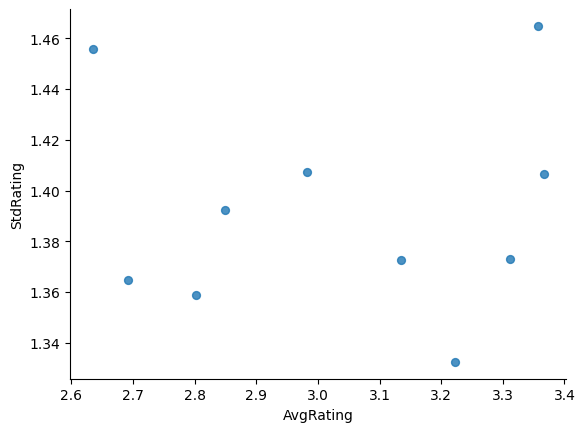

In [28]:
from matplotlib import pyplot as plt
controversial.plot(kind='scatter', x='AvgRating', y='StdRating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

###  Gender vs Age rating behavior

**Insights:**
- Cross-analyzing gender and age reveals complex demographic patterns in rating behavior, showing how these factors interact.

<Axes: title={'center': 'Gender vs Age Ratings'}, xlabel='Age'>

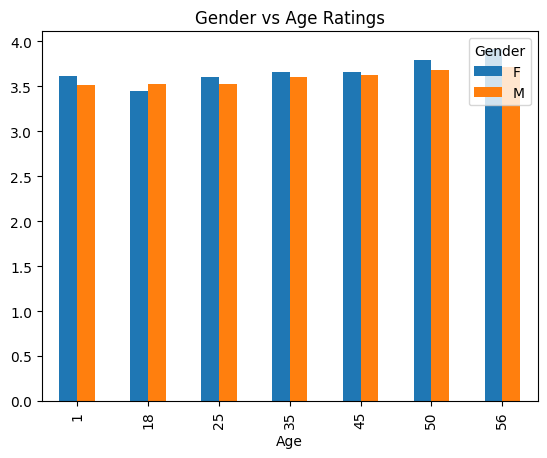

In [29]:
gender_age = df.pivot_table(index="Age", columns="Gender", values="Rating", aggfunc="mean")
gender_age.plot(kind="bar", title="Gender vs Age Ratings")


###  Day vs Night rating behavior

**Insights:**
- Day vs. night rating behavior can reveal whether viewing context (daytime vs. evening) affects how users rate movies.

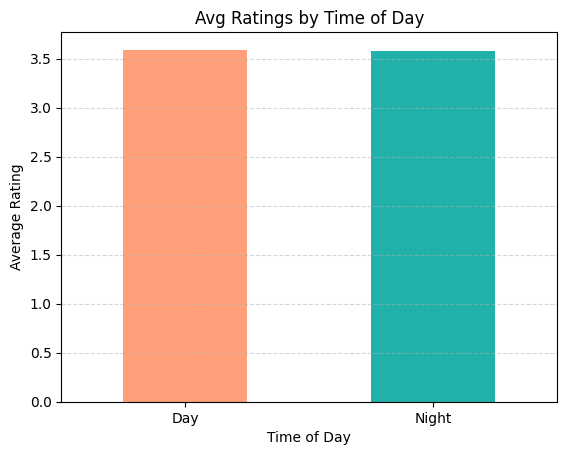

In [31]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit="s")
df["Hour"] = df["Datetime"].dt.hour
df["TimeOfDay"] = df["Hour"].apply(lambda h: "Night" if h < 6 or h >= 20 else "Day")
df.groupby("TimeOfDay")["Rating"].mean().plot(kind="bar", title="Avg Ratings by Time of Day", color=["#FFA07A", "#20B2AA"])

plt.ylabel("Average Rating")
plt.xlabel("Time of Day")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

###  Are users becoming stricter?

**Insights:**
- Smoothed trends over time can reveal whether users are becoming stricter or more lenient in their ratings as the platform matures.

<Axes: title={'center': '6-Month Smoothed Avg Rating'}, xlabel='Datetime'>

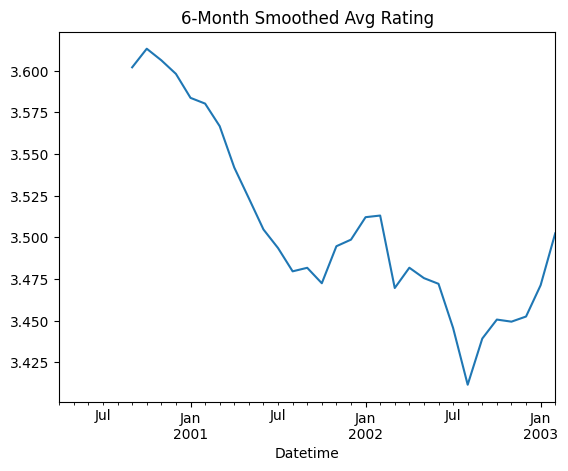

In [32]:
monthly_avg.rolling(window=6).mean().plot(title="6-Month Smoothed Avg Rating")


###  User rating bias

**Insights:**
- User rating bias shows the distribution of individual users' average ratings, revealing whether some users are consistently harsh or generous raters.

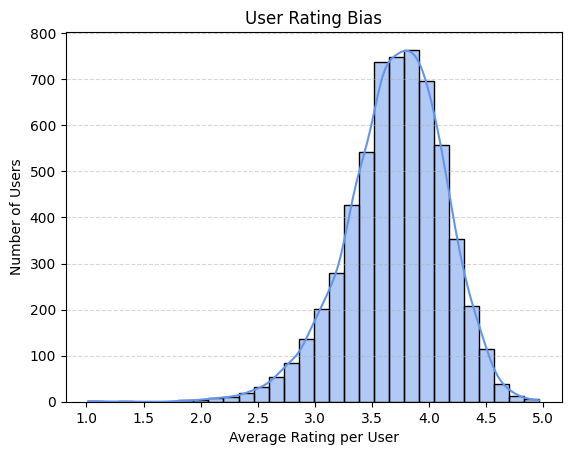

In [34]:
user_bias = df.groupby("UserID")["Rating"].mean()

sns.histplot(user_bias, bins=30, kde=True, color="#6495ED")
plt.title("User Rating Bias")
plt.xlabel("Average Rating per User")
plt.ylabel("Number of Users")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


###  Long tail distribution of movies

**Insights:**
- The long-tail distribution shows that most movies receive few ratings while a small number receive many ratings, following a typical power-law distribution.

Text(0.5, 1.0, 'Movie Rating Frequency (Log Scale)')

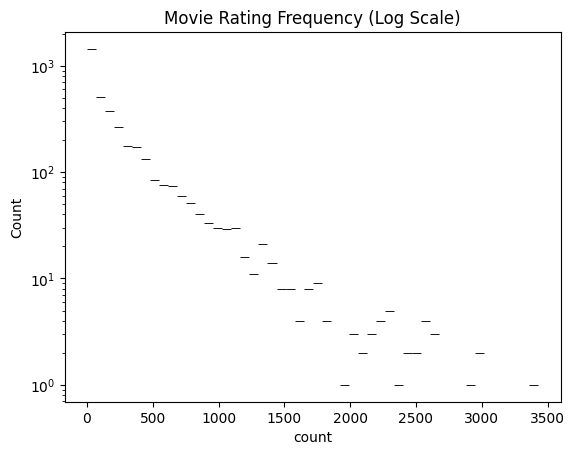

In [35]:
movie_counts = df["Title"].value_counts()
sns.histplot(movie_counts, log_scale=(False, True), bins=50)
plt.title("Movie Rating Frequency (Log Scale)")


###  Preferences of high raters vs low raters

**Insights:**
- Comparing preferences of high vs. low raters reveals whether generous and strict raters prefer different types of movies, which could indicate quality vs. entertainment preferences.

 Top raters prefer:
 Genres
Drama       3235
Comedy      2240
Action      1945
Thriller    1391
Sci-Fi      1273
Name: count, dtype: int64

 Low raters prefer:
 Genres
Comedy      8982
Drama       7357
Action      6924
Thriller    5230
Sci-Fi      4528
Name: count, dtype: int64


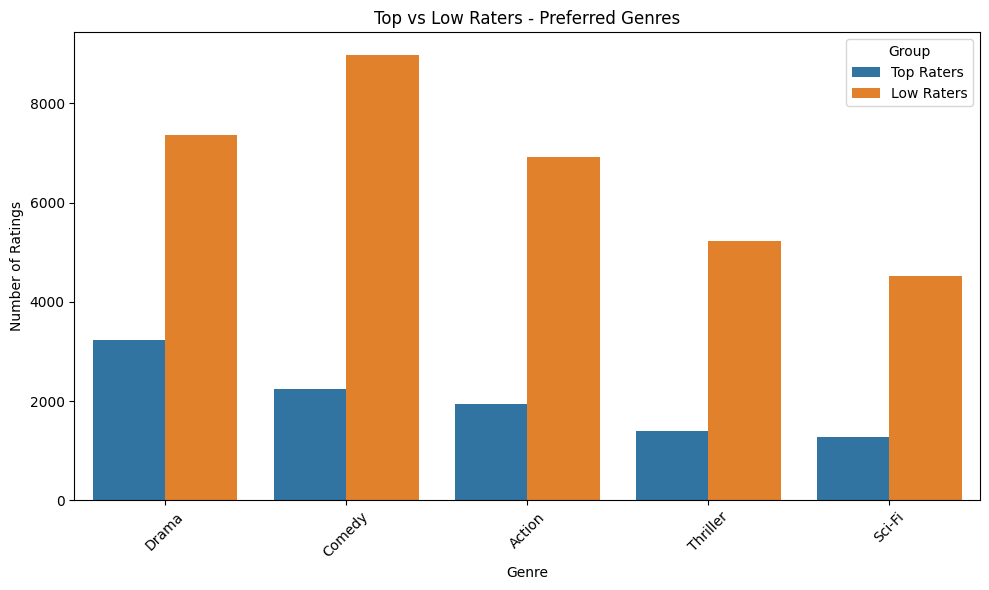

In [38]:

user_avg_rating = df.groupby("UserID")["Rating"].mean()

top_users = user_avg_rating.sort_values(ascending=False).head(100).index
bottom_users = user_avg_rating.sort_values().head(100).index


top_group = df[df["UserID"].isin(top_users)]
bottom_group = df[df["UserID"].isin(bottom_users)]


top_genres = top_group["Genres"].str.split("|").explode().value_counts().head(5)
bottom_genres = bottom_group["Genres"].str.split("|").explode().value_counts().head(5)

print(" Top raters prefer:\n", top_genres)
print("\n Low raters prefer:\n", bottom_genres)

top_df = pd.DataFrame({"Genre": top_genres.index, "Count": top_genres.values, "Group": "Top Raters"})
bottom_df = pd.DataFrame({"Genre": bottom_genres.index, "Count": bottom_genres.values, "Group": "Low Raters"})
combined_df = pd.concat([top_df, bottom_df])


plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="Genre", y="Count", hue="Group")
plt.title("Top vs Low Raters - Preferred Genres")
plt.ylabel("Number of Ratings")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Average ratings by age group and gender


Insights:


*  
Reveals preference patterns by age and gender, showing cultural or social influences on ratings.




/tmp/ipython-input-45-3115222299.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings_by_demo = df.groupby(['AgeGroup', 'Gender'])['Rating'].mean().unstack()


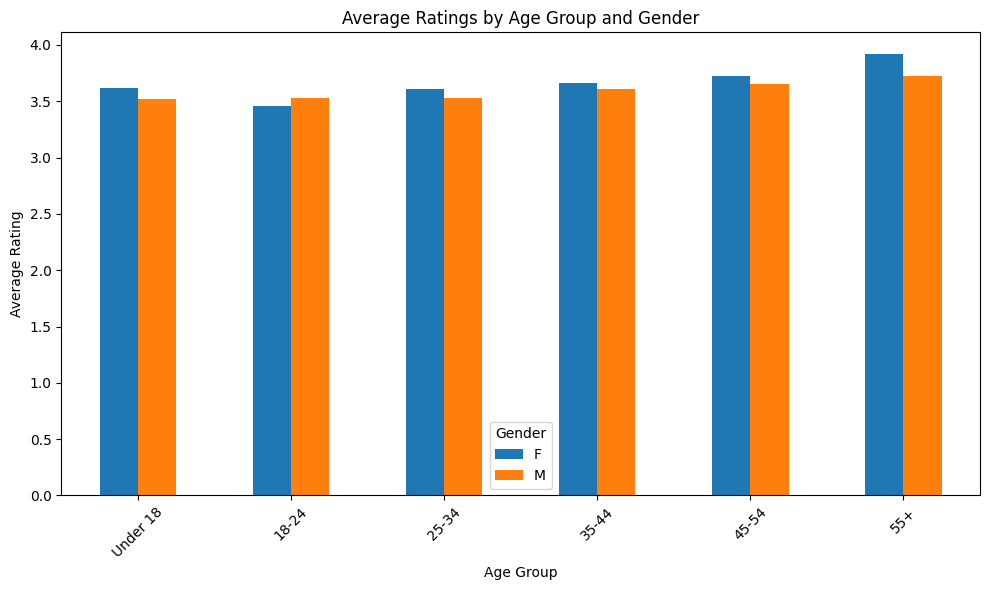

In [45]:
bins = [0, 18, 24, 34, 44, 54, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

avg_ratings_by_demo = df.groupby(['AgeGroup', 'Gender'])['Rating'].mean().unstack()

avg_ratings_by_demo.plot(kind='bar', figsize=(10, 6))
plt.title('Average Ratings by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Highest and lowest rated movies

Insights:



*   Identifies top and bottom movies with 50+ ratings, ensuring reliable quality insights.


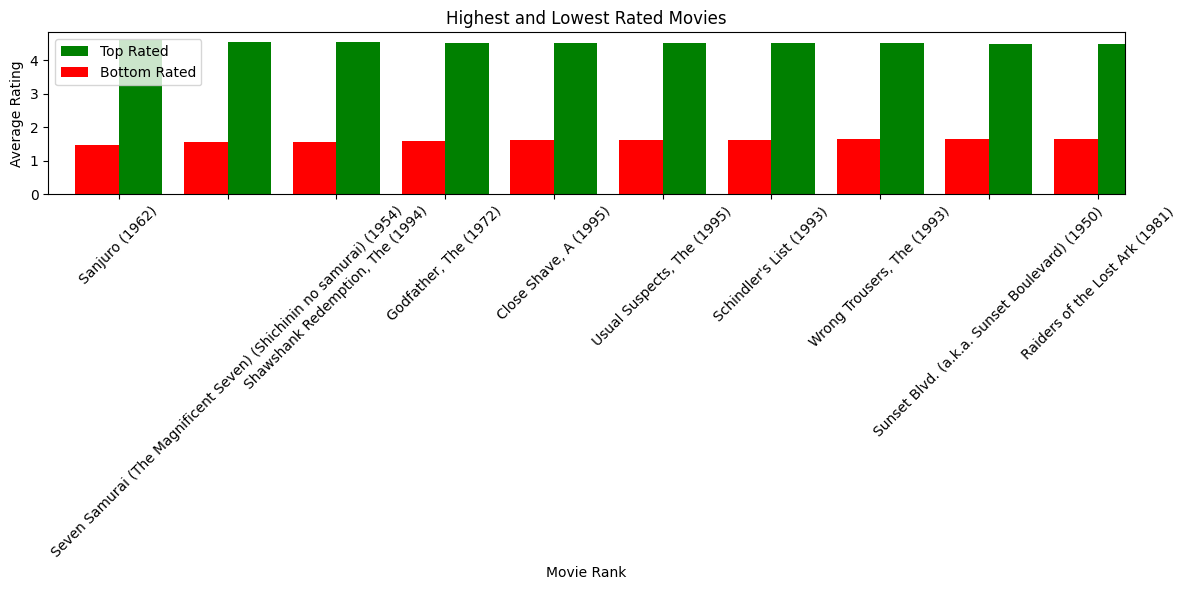

In [46]:
rated_movies = df.groupby('Title').agg({'Rating': ['mean', 'count']})
rated_movies.columns = ['AvgRating', 'NumRatings']
rated_movies = rated_movies[rated_movies['NumRatings'] >= 50]
top_rated = rated_movies.sort_values('AvgRating', ascending=False).head(10)
bottom_rated = rated_movies.sort_values('AvgRating').head(10)

plt.figure(figsize=(12, 6))
top_rated['AvgRating'].plot(kind='bar', color='green', label='Top Rated', position=0, width=0.4)
bottom_rated['AvgRating'].plot(kind='bar', color='red', label='Bottom Rated', position=1, width=0.4)
plt.title('Highest and Lowest Rated Movies')
plt.xlabel('Movie Rank')
plt.ylabel('Average Rating')
plt.legend()
plt.xticks(range(10), top_rated.index, rotation=45)
plt.tight_layout()
plt.show()

###Correlation between number of ratings and average rating

Insights:

*   Examines if popular movies (high ratings) align with high average ratings, revealing quality vs. popularity dynamics.

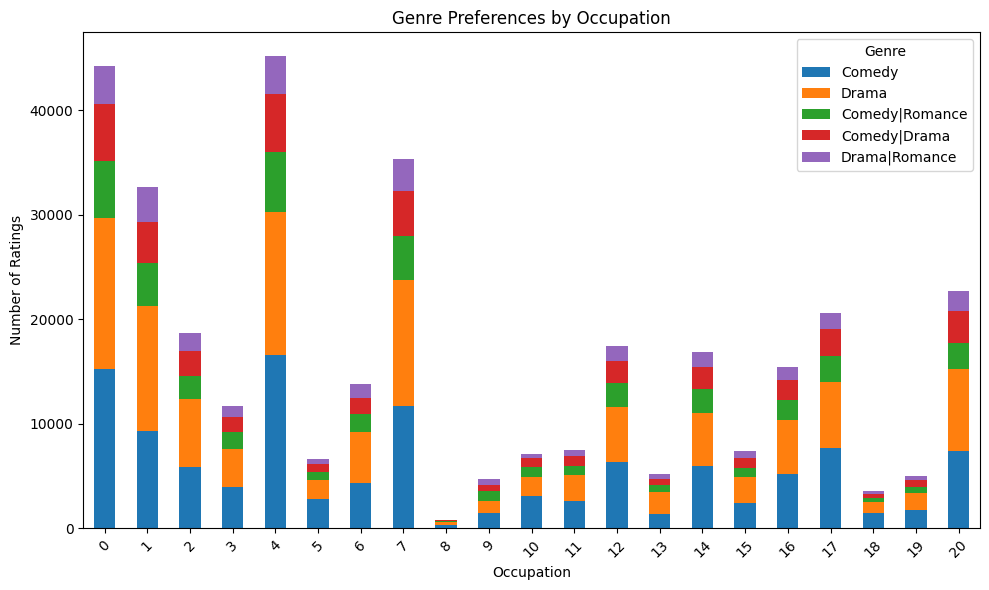

In [47]:
occ_genre_pref = df.groupby(['Occupation', 'Genres']).size().unstack(fill_value=0)
top_genres = occ_genre_pref.sum().sort_values(ascending=False).index[:5]
occ_genre_pref = occ_genre_pref[top_genres]

occ_genre_pref.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Genre Preferences by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()